In [28]:
import json
import os

In [29]:
def read_json(json_file):
    with open(json_file, 'r') as fh:
        json_data = json.load(fh)
    return json_data

def save_as_json(data, filename):
    with open(filename, 'w', encoding='utf-8') as fh:
        json.dump(data, fh, ensure_ascii=False, indent=4)

In [30]:
def check_dictionary(_dic):
    # check
    print(len(_dic.keys()))
    print(list(_dic.keys())[:5])
    print(list(_dic.items())[:10])

### build table, get all kinds of features together.

In [31]:
# labels
session_labels = read_json('./data/CED_Dataset/session_labels.json')

In [32]:
# topics
session_topics = read_json('./data/CED_Dataset/rumor_topic_gpt.json')
session_topics = {_id:value.get('category','其他') for _id, value in session_topics.items()}

In [33]:
# CARS
session_cars = read_json('./data/CED_Dataset/rumor_cars_gpt.json')

In [34]:
# sentiment
session_sentiment = read_json('./data/CED_Dataset/rumor_sentiment_gpt.json')
session_sentiment = {_id:value.get('情绪','其他') for _id, value in session_sentiment.items()}

In [ ]:
# others: length, #media, #hashtags
blog_data = read_json('./data/CED_Dataset/blog_features.json')
    # "zlKxCwIG1": {
    #     "multi": null,
    #     "text": "2月30号，阿拉了该放假，蒙牛却在为阿拉生产良心奶",
    #     "has_url": false,
    #     "comments": 30,
    #     "pics": 1,
    #     "source": "微博 weibo.com",
    #     "likes": 3,
    #     "time": 1362307624.0,
    #     "reposts": 170,
    #     "user_id": "2771041282"
    # },

blog_length = {_id: len(value['text']) for _id, value in blog_data.items() if _id in session_labels}
blog_has_url = {_id: value['has_url'] for _id, value in blog_data.items() if 'has_url' in value}
blog_pics = {_id: value['pics'] for _id, value in blog_data.items() if 'pics' in value}
blog_multi_media = {_id: value['multi'] for _id, value in blog_data.items() if 'multi' in value}

In [ ]:
# user profiles: (# followers, # followings, # posts, gender, geo, verified
user_features = read_json('./data/CED_Dataset/users_features.json')

user_followers = {}
user_verified_type = {}
user_gender = {}
user_messages = {}
user_friends = {}
user_description = {}


for _id in session_labels.keys():
    if user_id := blog_data[_id]['user_id']:
        user_feature = user_features[user_id]
    if isinstance(user_feature,dict):
        user_followers[_id] = user_feature['followers']
        user_verified_type[_id] = user_feature['verified_type']
        user_gender[_id] = user_feature['gender']
        user_messages[_id] = user_feature['messages']
        user_friends[_id] = user_feature['friends']
        user_description[_id] = user_feature['description']

In [ ]:
# graph structure, (# favorites, # retweets, # comments, # nodes, # edges, max_depth, num_depth_structure/nodes, num_breadth_structure/nodes)

blog_likes = {_id: value['likes'] for _id, value in blog_data.items() if _id in session_labels}
blog_comments = {_id: value['comments'] for _id, value in blog_data.items()  if _id in session_labels}
blog_reposts = {_id: value['reposts'] for _id, value in blog_data.items()  if _id in session_labels}

In [ ]:
blog_graph_features = read_json('./data/CED_Dataset/features_graph_structures.json')

In [ ]:
check_dictionary(blog_graph_features)

3387
['zlKxCwIG1', 'ynhebeIqb', 'z6wwfpabk', 'z4zqK6C0p', 'zsZvCcegh']
[('zlKxCwIG1', {'num_nodes': 169, 'max_depth': 4, 'num_depth_structure': 57, 'num_breadth_structure': 6123.0}), ('ynhebeIqb', {'num_nodes': 831, 'max_depth': 11, 'num_depth_structure': 468, 'num_breadth_structure': 66643.0}), ('z6wwfpabk', {'num_nodes': 257, 'max_depth': 7, 'num_depth_structure': 61, 'num_breadth_structure': 18949.0}), ('z4zqK6C0p', {'num_nodes': 171, 'max_depth': 3, 'num_depth_structure': 59, 'num_breadth_structure': 6167.0}), ('zsZvCcegh', {'num_nodes': 147, 'max_depth': 4, 'num_depth_structure': 38, 'num_breadth_structure': 5858.0}), ('yFrLkhFEQ', {'num_nodes': 760, 'max_depth': 9, 'num_depth_structure': 495, 'num_breadth_structure': 46008.0}), ('yArux0bEt', {'num_nodes': 147, 'max_depth': 7, 'num_depth_structure': 64, 'num_breadth_structure': 3405.0}), ('zn9INzOD4', {'num_nodes': 111, 'max_depth': 4, 'num_depth_structure': 7, 'num_breadth_structure': 5253.0}), ('yxxXM7KNd', {'num_nodes': 402, 'm

In [ ]:
# merge
import pandas as pd
sessions_data = pd.concat([
    pd.Series(session_labels),
    pd.Series(session_topics),
    pd.Series(session_sentiment),
    pd.Series(blog_length),
    pd.Series(blog_has_url),
    pd.Series(blog_pics),
    pd.Series(blog_multi_media),

    pd.Series(user_followers),
    pd.Series(user_verified_type),
    pd.Series(user_gender),
    pd.Series(user_messages),
    pd.Series(user_friends),
    pd.Series(user_description),
    
    pd.Series(blog_likes),
    pd.Series(blog_comments),
    pd.Series(blog_reposts),
    pd.DataFrame.from_dict(session_cars, orient='index'),
    pd.DataFrame.from_dict(blog_graph_features, orient='index'),
    ], axis=1
)

In [ ]:
sessions_data.columns = [
    'label','topic','sentiment','length',
    'has_url','num_pics','has_multimedia',
    'num_followers','verified_type','gender',
    'num_posts','num_friends','has_description',
    'num_likes','num_comments','num_reposts',
    'credibility','accuracy','reasonableness','support',
    'num_nodes','max_depth','num_depth_structure','num_breadth_structure',
]
sessions_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, zlKxCwIG1 to hzvscv
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   label                  3387 non-null   int64  
 1   topic                  3299 non-null   object 
 2   sentiment              3266 non-null   object 
 3   length                 3387 non-null   int64  
 4   has_url                3387 non-null   bool   
 5   num_pics               3387 non-null   int64  
 6   has_multimedia         0 non-null      object 
 7   num_followers          3304 non-null   float64
 8   verified_type          3304 non-null   float64
 9   gender                 3304 non-null   object 
 10  num_posts              3304 non-null   float64
 11  num_friends            3304 non-null   float64
 12  has_description        3304 non-null   object 
 13  num_likes              3387 non-null   int64  
 14  num_comments           3387 non-null   int64  
 15 

In [ ]:
# pd.Series(blog_length)
# pd.DataFrame.from_dict(session_labels, orient='index')

### check and clean

In [ ]:
sessions_data.drop('has_multimedia', axis=1, inplace=True)

In [ ]:
sessions_data.dropna(inplace=True)

In [39]:
category_variables = [
    'topic','sentiment',
    'has_url','verified_type','gender','has_description',
]
sessions_data[category_variables] = sessions_data[category_variables].astype('category')

In [ ]:
sessions_data.info()

### check by features

In [ ]:
!pip install matplotlib

In [64]:
from matplotlib import pyplot as plt
import matplotlib

In [69]:
def label_distribution(feature_name, dataframe, y=None):
    """
    input with feature name, dataframe, and may have a y for group;
    feature can be 
    """
    # Separate data based on labels
    for label in set(list(dataframe[y])):

        label_data = dataframe[dataframe[y] == label][feature_name]
        plt.hist(label_data, bins='auto', alpha=0.2, label=f'Label {label}')

    # Set labels and title
    # plt.xlabel('Feature')
    # plt.ylabel('Frequency')
    # plt.title('Distribution of Feature by Label')

    # Add legend
    plt.legend()

    # Display the plot
    plt.show()


<Axes: >

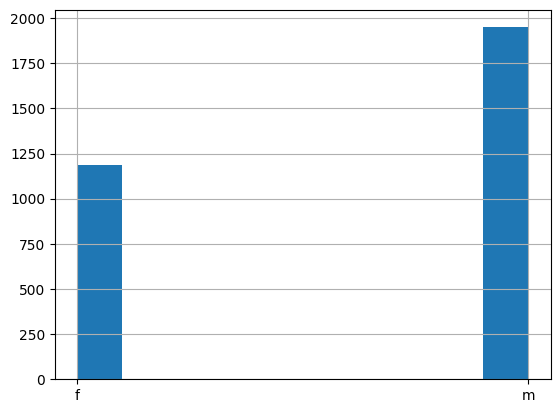

In [65]:
# sessions_data.info()
# sessions_data['gender'].hist()
label_distribution()

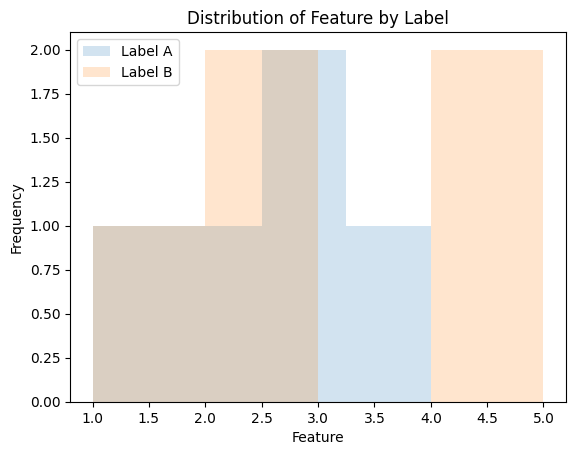

In [67]:
import matplotlib.pyplot as plt
import pandas as pd




### rulefit

In [ ]:
from rulefit import RuleFit

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [44]:
y = sessions_data.label.values
X_columns = [
    'topic','sentiment','length',
    'has_url','num_pics','verified_type',
    'num_followers','gender',
    'num_posts','num_friends','has_description',
    'num_likes','num_comments','num_reposts',
    'credibility','accuracy','reasonableness','support',
    'num_nodes','max_depth','num_depth_structure','num_breadth_structure',
]
X = sessions_data[X_columns]


In [49]:
encoder = OneHotEncoder(drop='first')

X_encoded = encoder.fit_transform(X[category_variables])
X_encoded_df = pd.DataFrame(X_encoded.toarray(), columns=encoder.get_feature_names_out(category_variables), index=X.index)
X_cat = pd.concat([X.drop(category_variables, axis=1), X_encoded_df], axis=1)

In [ ]:
X_cat.info()
# X_cat.isnull()

In [54]:
# from sklearn.ensemble import GradientBoostingRegressor
# gb = GradientBoostingRegressor(n_estimators=500, max_depth=10, learning_rate=0.01)
# rf = RuleFit(gb)

# rf.fit(X, y, feature_names=features)


In [ ]:
X_cat_values = X_cat.values

rf = RuleFit()
rf.fit(X_cat_values, y, feature_names=X_cat.columns)

In [55]:
rules = rf.get_rules()

rules = rules[rules.coef != 0].sort_values("support", ascending=False)

print(rules)

                                                   rule    type          coef  \
3                                             num_posts  linear  3.385289e-07   
12                                            num_nodes  linear  9.158694e-05   
43                                           topic_社会秩序  linear  1.217882e-02   
55                                           topic_财产安全  linear  4.073411e-02   
86                                    verified_type_2.0  linear -1.485558e-03   
...                                                 ...     ...           ...   
1364  max_depth > 6.5 & max_depth > 2.5 & num_repost...    rule  2.370049e-02   
131              num_posts > 133710.0 & num_likes > 0.5    rule  6.190522e-03   
1225  max_depth > 2.5 & num_reposts <= 210.0 & num_n...    rule -3.019314e-02   
466          num_followers <= 2169.5 & topic_奇闻趣事 > 0.5    rule -2.099134e-02   
291   num_followers <= 1994642.0 & sentiment_积极 <= 0...    rule  1.497722e-02   

       support  importance 

In [58]:
# type(rules)
rules.to_csv('./rules_01.csv',sep='^',index=False)